# Introduction to Credit Risk
   - Credit risk is the risk of loss due to a borrower's failure to repay a loan or meet contractual obligations. This section delves into how credit risk is managed in the banking sector, particularly for Bati Bank's buy-now-pay-later initiative, managing credit risk is crucial to ensure sustainability and minimize defaults.

## Visualization

### imports

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [2]:
# Load your actual data
df = pd.read_csv('../data/data.csv')  # Adjust path as necessary

### Subset Relevant Data

In [11]:
# Subset relevant data for credit risk analysis
credit_risk_df = df[['AccountId', 'Amount', 'ChannelId', 'FraudResult']].copy()

# Rename columns for clarity (optional)
credit_risk_df.rename(columns={'FraudResult': 'IsFraudulent'}, inplace=True)

### Basic Statistics for Amount

In [12]:
# Display descriptive statistics for the 'Amount' column
print("Transaction Amount Statistics:")
print(credit_risk_df['Amount'].describe())

Transaction Amount Statistics:
count    9.566200e+04
mean     6.717846e+03
std      1.233068e+05
min     -1.000000e+06
25%     -5.000000e+01
50%      1.000000e+03
75%      2.800000e+03
max      9.880000e+06
Name: Amount, dtype: float64


### Visualize Amount Distribution

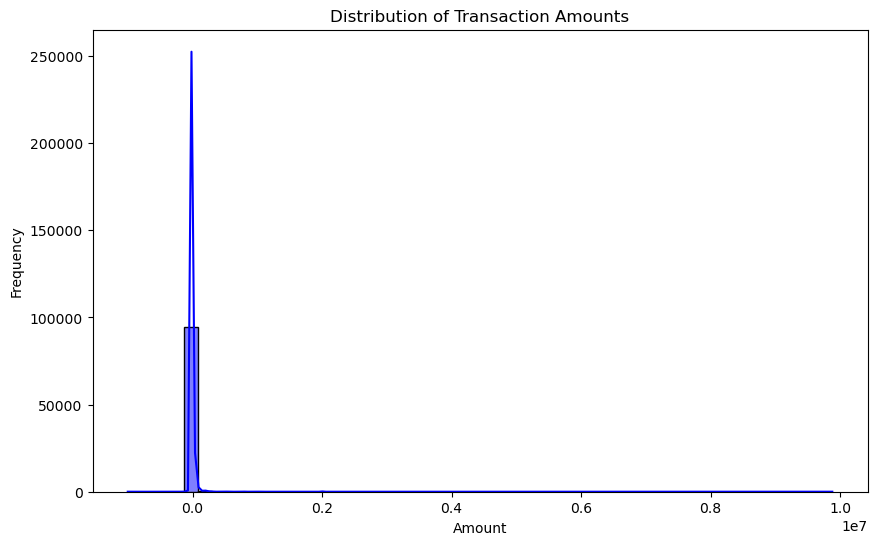

In [13]:
# Histogram of transaction amounts using Seaborn
plt.figure(figsize=(10, 6))
sns.histplot(credit_risk_df['Amount'], bins=50, kde=True, color='blue')
plt.title('Distribution of Transaction Amounts')
plt.xlabel('Amount')
plt.ylabel('Frequency')
plt.show()

### Fraudulent vs Non-Fraudulent Transactions by Channel (Bar Chart)

In [14]:
# Grouped bar chart for fraudulent vs non-fraudulent transactions by channel using Plotly
fraud_counts = credit_risk_df.groupby(['ChannelId', 'IsFraudulent']).size().reset_index(name='Count')

fig = px.bar(
    fraud_counts, 
    x='ChannelId', 
    y='Count', 
    color='IsFraudulent', 
    title='Fraudulent vs Non-Fraudulent Transactions by Channel', 
    labels={'ChannelId': 'Channel', 'Count': 'Transaction Count', 'IsFraudulent': 'Fraudulent?'},
    barmode='stack'
)
fig.show()

### Fraud Percentage by Channel

/var/folders/h5/cqk4jd793hzd58k1ssq6mkd40000gn/T/ipykernel_3276/1777612185.py:6: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




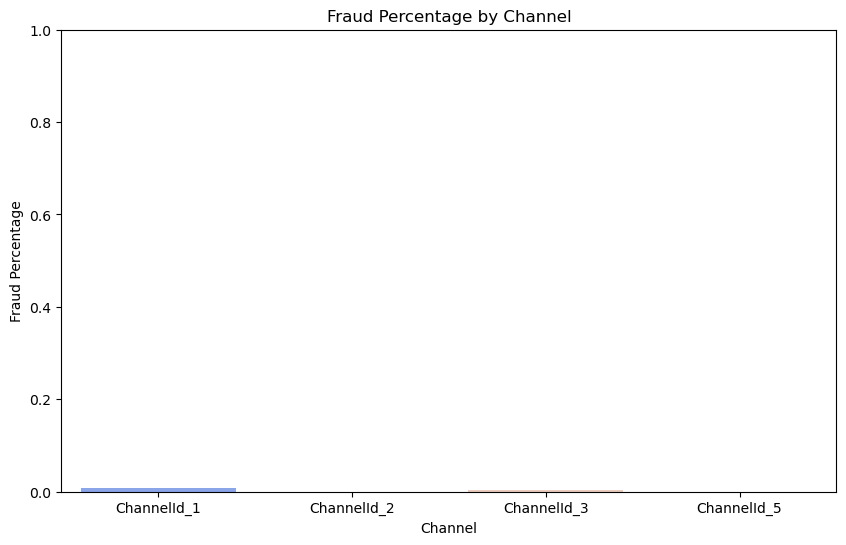

In [15]:
# Calculate fraud percentage per channel
fraud_percentage = credit_risk_df.groupby('ChannelId')['IsFraudulent'].mean().reset_index(name='FraudPercentage')

# Visualize fraud percentage by channel using Seaborn
plt.figure(figsize=(10, 6))
sns.barplot(data=fraud_percentage, x='ChannelId', y='FraudPercentage', palette='coolwarm')
plt.title('Fraud Percentage by Channel')
plt.xlabel('Channel')
plt.ylabel('Fraud Percentage')
plt.ylim(0, 1)  # Fraud percentage ranges from 0 to 1
plt.show()

### Interactive Visualizations

In [9]:
import plotly.express as px

fig = px.scatter(
    df, 
    x='Amount',  # Choose an appropriate column for the x-axis
    y='Value',   # Choose an appropriate column for the y-axis
    color='FraudResult',  # Use an existing column for color differentiation
    title='Amount vs Value with Fraud Result'
)
fig.show()

### Custom Functions for Analysis:

Summary statistics of Amount grouped by IsFraudulent:
                count          mean           std        min       25%  \
IsFraudulent                                                             
0             95469.0  3.627723e+03  4.035711e+04 -1000000.0     -50.0   
1               193.0  1.535272e+06  2.100525e+06  -900000.0  500000.0   

                   50%        75%        max  
IsFraudulent                                  
0               1000.0     2500.0  2400000.0  
1             600000.0  2000000.0  9880000.0  


/var/folders/h5/cqk4jd793hzd58k1ssq6mkd40000gn/T/ipykernel_3276/899558144.py:19: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




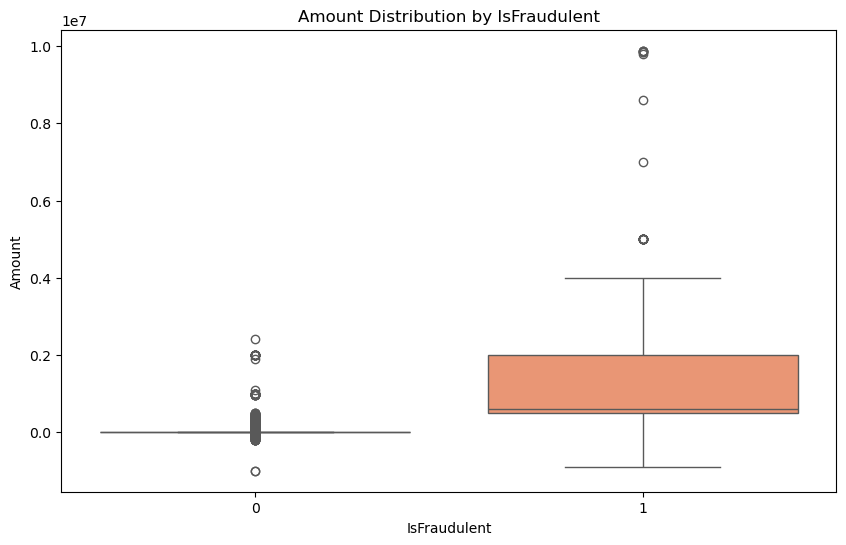

In [17]:
def analyze_credit_risk(df, feature, target='IsFraudulent'):
    """
    Analyze a feature to see its relation to a target column (e.g., fraud or default risk).

    :param df: DataFrame containing credit data
    :param feature: Column name to analyze
    :param target: Target column to group by (e.g., 'IsFraudulent' or 'Defaulted')
    :return: None, prints summary and shows plot
    """
    if target not in df.columns:
        raise KeyError(f"'{target}' column not found in the DataFrame.")
    
    # Summary statistics grouped by the target
    print(f"Summary statistics of {feature} grouped by {target}:")
    print(df.groupby(target)[feature].describe())
    
    # Boxplot of the feature grouped by the target
    plt.figure(figsize=(10, 6))
    sns.boxplot(data=df, x=target, y=feature, palette='Set2')
    plt.title(f'{feature} Distribution by {target}')
    plt.xlabel(target)
    plt.ylabel(feature)
    plt.show()

# Analyze 'Amount' grouped by 'IsFraudulent'
analyze_credit_risk(credit_risk_df, 'Amount', target='IsFraudulent')

### References
 
* - [Basel II Capital Accord](link_to_Basel_II)
* - [Investopedia - Credit Risk](link_to_investopedia)
* - Document learning outcomes: markdown

### Learning Outcomes
* - Gained knowledge on how credit risk influences banking operations.
* - Understood the necessity of regulatory compliance in credit scoring.
